In [1]:
from functions import *
from random import sample
import json
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
import itertools


In [2]:
#base_path = "/media/ruben/Data Drive/react-data/protest/selection2"
base_path = "D:/react-data/protest/selection2"


# Get URL-ID from entity files
ids_ = dict()

for photo in [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]:
    photo_folder = os.path.join(base_path, photo)
    photo_source = os.listdir(os.path.join(photo_folder,photo+'_'+"source"))[0]
    photo = photo_source #os.path.join(photo_folder,photo+'_'+"source",photo_source)
    if photo not in ids_.keys():
        ids_.update({photo:list()})
    
    folders = [fol for fol in os.listdir(photo_folder) if os.path.isdir(os.path.join(photo_folder,fol)) and "source" not in fol and "context" not in fol]
    
    for f in folders:
        fn = os.path.join(photo_folder, f, "txt","parsed_text.json")

        with open(fn) as fp:
            file = json.load(fp)
        
        for id_ in file.keys():
            
            identif = id_.split("html_")[0].split('html/')[-1][:-1]
            url = id_.split("html_")[1]
            ids_[photo].append(url)

In [3]:
st = []

for photo,urls in ids_.items():
    
    for other_photo,other_urls in ids_.items():
        
        if photo == other_photo:
            continue
        else:
            overlap = [u for u in urls if u in other_urls]
            if len(overlap) > 1:
                st.append([photo, other_photo,len(list(set(overlap)))])


In [4]:
t = [[i[0].split('.')[0],i[1].split('.')[0],i[2]] for i in st]
ttuples = [(i[0].split('.')[0],i[1].split('.')[0]) for i in st]

In [5]:
seen = set()
unique = []
for x in ttuples:
    srtd = tuple(sorted(x))
    if srtd not in seen:
        unique.append(x)
        seen.add(srtd)


In [6]:
t2 = []

for tup in seen:
    source= tup[0]
    target = tup[1]
    weight = [x[2] for x in t if x[0] == source and x[1] == target][0]
    t2.append([source,target,weight])

In [7]:
t2 = pd.DataFrame(t2,columns = ['source','target','weight'])
t2['weight'] = t2['weight'].astype(str)
t2.to_csv('overlap-network-edges.csv',index=False)

In [8]:
nodes = list(set([i[0] for i in st] + [i[1] for i in st]))
nodes = [[i.split('.')[0],i] for i in nodes]

In [9]:
n = pd.DataFrame(nodes,columns = ['id','image'])
n.to_csv('overlap-network-nodes.csv',index=False)

In [35]:
t = t.pivot(index='source',columns='target',values='weight').fillna(0)

In [38]:
t.to_csv('image-collocations.csv',index=False)

<Figure size 432x288 with 0 Axes>

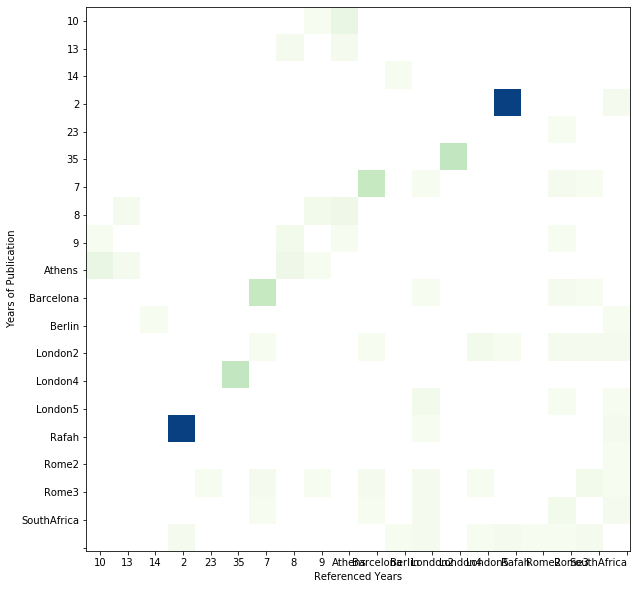

In [15]:
resdf2p = t.pivot(index='source',columns='target',values='weight')

fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(30,10))
heatplot = ax.imshow(resdf2p, cmap='GnBu')
ax.set_xticklabels(resdf2p.columns)
ax.set_yticklabels(resdf2p.index)

tick_spacing = 1.02
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.ylabel('Years of Publication')
plt.xlabel('Referenced Years')


plt.show()